# Compare 1D and 2D Vel and Drag



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
from pylab import *
import scipy.integrate as integrate
#from cmocean import cm as cmo
import matplotlib.gridspec as gridspec
import matplotlib.ticker 
import scipy.stats as stats
import scipy.optimize as optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import savgol_filter
from netCDF4 import Dataset

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [229]:
# Load Dedalus Run

#%% Pick the filename and path
filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LONG.h5' #Ruan case F
visc = 1e-4

# filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LOWV.h5' #Ruan case F
# visc = 5e-5

f = h5py.File(filename, 'r')

# Get the data
data = list(f['tasks'])

# Basic parameters


# Load variables in physical space
u = f['tasks']['u'] # Cross-slope direction
v = f['tasks']['v'] # Along-slope direction


# Domain parameters
x = u.dims[1][0][:]
z = u.dims[2][0][:]
time = u.dims[0][0][:]
# kx = f['scales/kx'][:]/(2*np.pi) # Inverse wavelengths in cross-front direction
vgz = f['tasks']['bxbar'][:,0,:]/1e-4
vg = integrate.cumtrapz(vgz, x=z, axis=-1, initial=0)
vg = vg - vg[:,-1][:,np.newaxis]

# Calculations
zm = z-z[-1]

um = np.mean(u, axis=1)
vm = np.mean(v, axis=1)
# up = u - um[:,np.newaxis,:]
# vp = v - vm[:,np.newaxis,:]

uz = np.gradient(um, axis=-1)/np.gradient(z)
vz = np.gradient(vm, axis=-1)/np.gradient(z)

tauy = -1035*1e-4*vz[:,0]#Note that 1e-4 is the viscosity for the DNS
taux = -1035*1e-4*uz[:,0] #Note that 1e-4 is the viscosity for the DNS

tmag = np.sqrt(tauy**2 + taux**2)

In [230]:
# Load GOTM

filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/GOTMOUTPUTS/gotm_1e-5_0p02.nc' # Ruan et al. 2019 case F
N2 = 1e-5
tht = 0.02

ds =  Dataset(filename, 'r')  # Dataset is the class behavior to open the file

u1 = np.squeeze(ds.variables['u'])
v1 = np.squeeze(ds.variables['v'])
av = np.squeeze(ds.variables['num'])
b = ds.variables['buoy'][:,:,0,0]


taub1 = np.squeeze(ds.variables['taub'])
drag1 = np.squeeze(ds.variables['drag'][:,0])
time1 = ds.variables['time'][:]

z1 = ds.variables['z1'][:][0,:,0,0]
z = ds.variables['z'][:][0,:,0,0]
bz = np.gradient(b, axis=-1)/np.gradient(z)
vgz = -(bz-N2)*np.sin(tht)/1e-4
vgg = integrate.cumtrapz(vgz, x=z, axis=-1, initial=0)
vgg = vgg - vgg[:,-1][:,np.newaxis]
# bpert = b + N2*(z-z[0])

taux1 = -1035*((av[:,1][:,np.newaxis])*(np.gradient(u1, axis=-1))/np.gradient(z))[:,0]
tauy1 = -1035*((av[:,1][:,np.newaxis])*(np.gradient(v1, axis=-1))/np.gradient(z))[:,0]

tmag1 = np.sqrt(tauy1**2 + taux1**2)

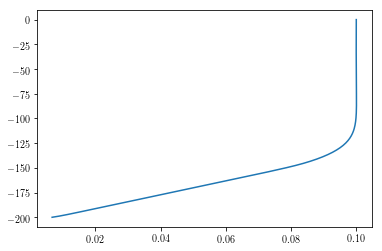

In [231]:
plt.plot(vg[-10,:]+0.1, zm)

In [258]:
# Load Dedalus Run # 2

#%% Pick the filename and path
# filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_LONG.h5' #Ruan case F
visc = 1e-4

filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p02/snapshots/snapshots_1e-5_0p02_Q1D.h5' #Ruan case F
# filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/SI_DNS/SI_1e-5_0p05/snapshots/snapshots_1e-5_0p05.h5' #Ruan case F

visc = 1e-4

f = h5py.File(filename, 'r')

# Get the data
data = list(f['tasks'])

# Basic parameters


# Load variables in physical space
u = f['tasks']['u'] # Cross-slope direction
v = f['tasks']['v'] # Along-slope direction

# Domain parameters
x = u.dims[1][0][:]
z = u.dims[2][0][:]
time1 = u.dims[0][0][:]
# kx = f['scales/kx'][:]/(2*np.pi) # Inverse wavelengths in cross-front direction
vgz = f['tasks']['bxbar'][:,0,:]/1e-4
vg1 = integrate.cumtrapz(vgz, x=z, axis=-1, initial=0)
vg1 = vg1 - vg1[:,-1][:,np.newaxis]

# Calculations
zm = z-z[-1]

u1 = np.mean(u, axis=1)
v1 = np.mean(v, axis=1)
# up = u - um[:,np.newaxis,:]
# vp = v - vm[:,np.newaxis,:]

uz = np.gradient(u1, axis=-1)/np.gradient(z)
vz = np.gradient(v1, axis=-1)/np.gradient(z)

tauy1 = -1035*visc*vz[:,0]#Note that 1e-4 is the viscosity for the DNS
taux1 = -1035*visc*uz[:,0] #Note that 1e-4 is the viscosity for the DNS

tmag1 = np.sqrt(tauy1**2 + taux1**2)

## Make Vel Plot




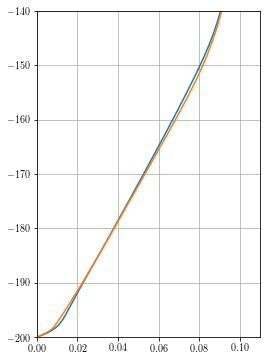

In [260]:
ts = np.where((time/86400>35) & (time/86400<45))[0]
ts1 = np.where((time1/86400>35) & (time1/86400<45))[0]

plt.figure(figsize=(4, 6))
plt.plot(np.mean(vm[ts,:], axis=0)+0.1, zm)
# plt.plot(np.mean(vm[ts,:], axis=0)+0.1, zm)

plt.plot(np.mean(v1[ts1,:], axis=0)+0.1, zm)
# plt.plot(np.mean(vgg[ts1,:], axis=0)+0.1, z+100)
# plt.plot(np.mean(v1[ts1,:], axis=0), z+100)

plt.ylim(-200, -140)
plt.xlim(0, 0.11)
plt.grid()

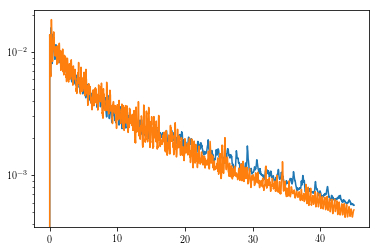

In [261]:
plt.figure()
plt.semilogy(time/86400, -tauy)
plt.plot(time1/86400, -tauy1)

# plt.plot(time/86400, taux)
# plt.plot(time1/86400, taux1)



(0, 45)

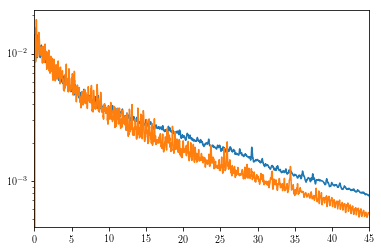

In [263]:
plt.semilogy(time/86400, tmag)
plt.semilogy(time1/86400, tmag1)
plt.xlim(0, 45)
# plt.ylim(2e-3, 2e-2)

In [252]:
zind = np.where(z>100*np.nanmean(delv))[0][0]
zind=0
plt.plot(time1/86400, integrate.cumtrapz(-(0.1+vg1[:,zind])*tauy1, x=time1, initial=0))
plt.plot(time/86400, integrate.cumtrapz(-(vg[:,zind]+0.1)*tauy, x=time, initial=0))
plt.xlim(0, 10)
# plt.ylim(1e-4, 1e-3)

NameError: name 'vm1' is not defined

(5e-08, 1e-06)

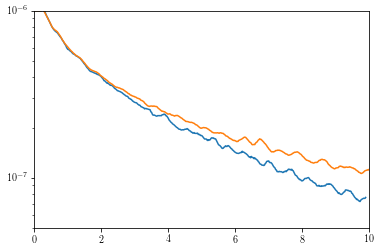

In [135]:
zind = np.where(z>100*np.nanmean(delv))[0][0]
plt.semilogy(time1/86400, 1e-3*(0.1+vg1[:,zind])**3)
plt.plot(time/86400, 1e-3*(vg[:,zind]+0.1)**3)
plt.xlim(0, 10)
plt.ylim(5e-8, 1e-6)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


(0, 10)

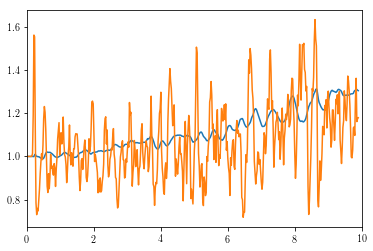

In [151]:
zind = np.where(z>100*np.nanmean(delv))[0][0]
zind=0
plt.plot(time1/86400, np.interp(time1, time, (vg[:,zind]+0.1)**1)/ (0.1+vg1[:,zind])**1)
plt.plot(time1/86400, np.interp(time1, time, (vg[:,zind]+0.1)*tauy)/ ((0.1+vg1[:,zind])*tauy1))

# plt.plot(time/86400, 1e-3*(vg[:,zind]+0.1)**3)
plt.xlim(0, 10)
# plt.ylim(5e-8, 1e-6)

(0, 10)

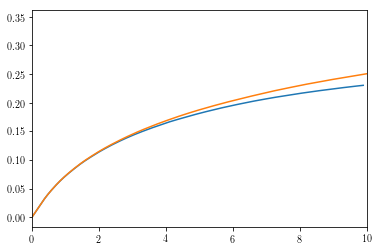

In [138]:
zind = np.where(z>100*np.nanmean(delv))[0][0]
plt.plot(time1/86400, integrate.cumtrapz(1e-3*(0.1+vg1[:,zind])**3, x=time1, initial=0))
plt.plot(time/86400, integrate.cumtrapz(1e-3*(vg[:,zind]+0.1)**3, x=time, initial=0))
plt.xlim(0, 10)
# plt.ylim(5e-8, 1e-6)

In [139]:
timeind = np.where(time/86400>9.89)[0][0]
(vg[timeind,0]+0.1)*tauy[timeind]/((vg1[-1,0]+0.1)*tauy1[-1])
tauy[timeind]/tauy1[-1]

0.9033663648981509

In [144]:
np.interp(time1, time, (vg[:,zind]+0.1)**3)/(vg1[:,zind]+0.1)**3

array([0.99997219, 0.99999328, 0.99999593, 0.99999746, 0.99999837,
       0.99999892, 0.99999931, 0.99999981, 1.00000518, 1.00014792,
       1.00199768, 1.01715946, 1.00123552, 1.00886693, 1.00255068,
       0.9840936 , 0.98922984, 0.99293491, 0.99764536, 0.99329522,
       0.99350131, 0.9995099 , 1.00241065, 1.00668594, 1.00350925,
       1.00113213, 1.00299805, 1.00632232, 1.00967569, 1.01065146,
       1.0145341 , 1.01531033, 1.01367559, 1.01320051, 1.01298246,
       1.01520564, 1.01301459, 1.01209956, 1.00345564, 1.00246331,
       1.00476036, 1.00182042, 1.0020126 , 1.00838013, 1.00775656,
       1.01207279, 1.02487355, 1.02917069, 1.03240041, 1.02110079,
       1.01774002, 1.01868958, 1.01499592, 1.00888022, 1.01464868,
       1.01326741, 1.01273269, 1.00523866, 1.00284383, 1.00621236,
       1.00659501, 1.0042138 , 1.00167555, 1.00581556, 1.00761032,
       1.00452311, 1.00394785, 1.00947322, 1.00817326, 1.01146065,
       1.00844356, 1.01470719, 1.01524698, 1.01280363, 1.01532

In [13]:
us = np.sqrt(np.abs(tauy)/1030)
delv = 1e-4/us
delv[np.isinf(delv)] = np.nan
delv

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([       nan, 0.02732972, 0.03224222, ..., 0.13371358, 0.13365066,
       0.13437923])

In [14]:
np.nanmean(delv)

0.08137013873642097

In [74]:
vgz = f['tasks']['bxbar'][:,0,:]/1e-4
vg = integrate.cumtrapz(vgz, x=z, axis=-1, initial=0)
vg = vg - vg[:,-1][:,np.newaxis]

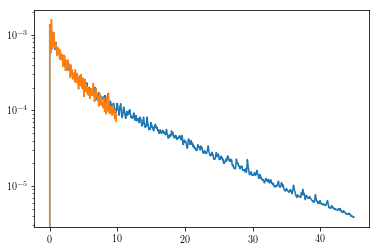

In [85]:
plt.semilogy(time/86400, (vg[:,0]+0.1)*tauy)
plt.plot(time1/86400, (vg1[:,0]+0.1)*tauy1)